In [1]:


import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import masked_select
import os 
import netCDF4
from torch.autograd import Variable
from torch.optim import Adam, SGD
from utils import *
from network_architectures import *
from torch.optim.lr_scheduler import ExponentialLR
from torch.optim.lr_scheduler import _LRScheduler
import json
import sys

from dataset import *








(-0.41219479634744954, 1.1418218026290803)
(-0.4176, 1.1214)
(11.542267800735619, 23.953845664938576)


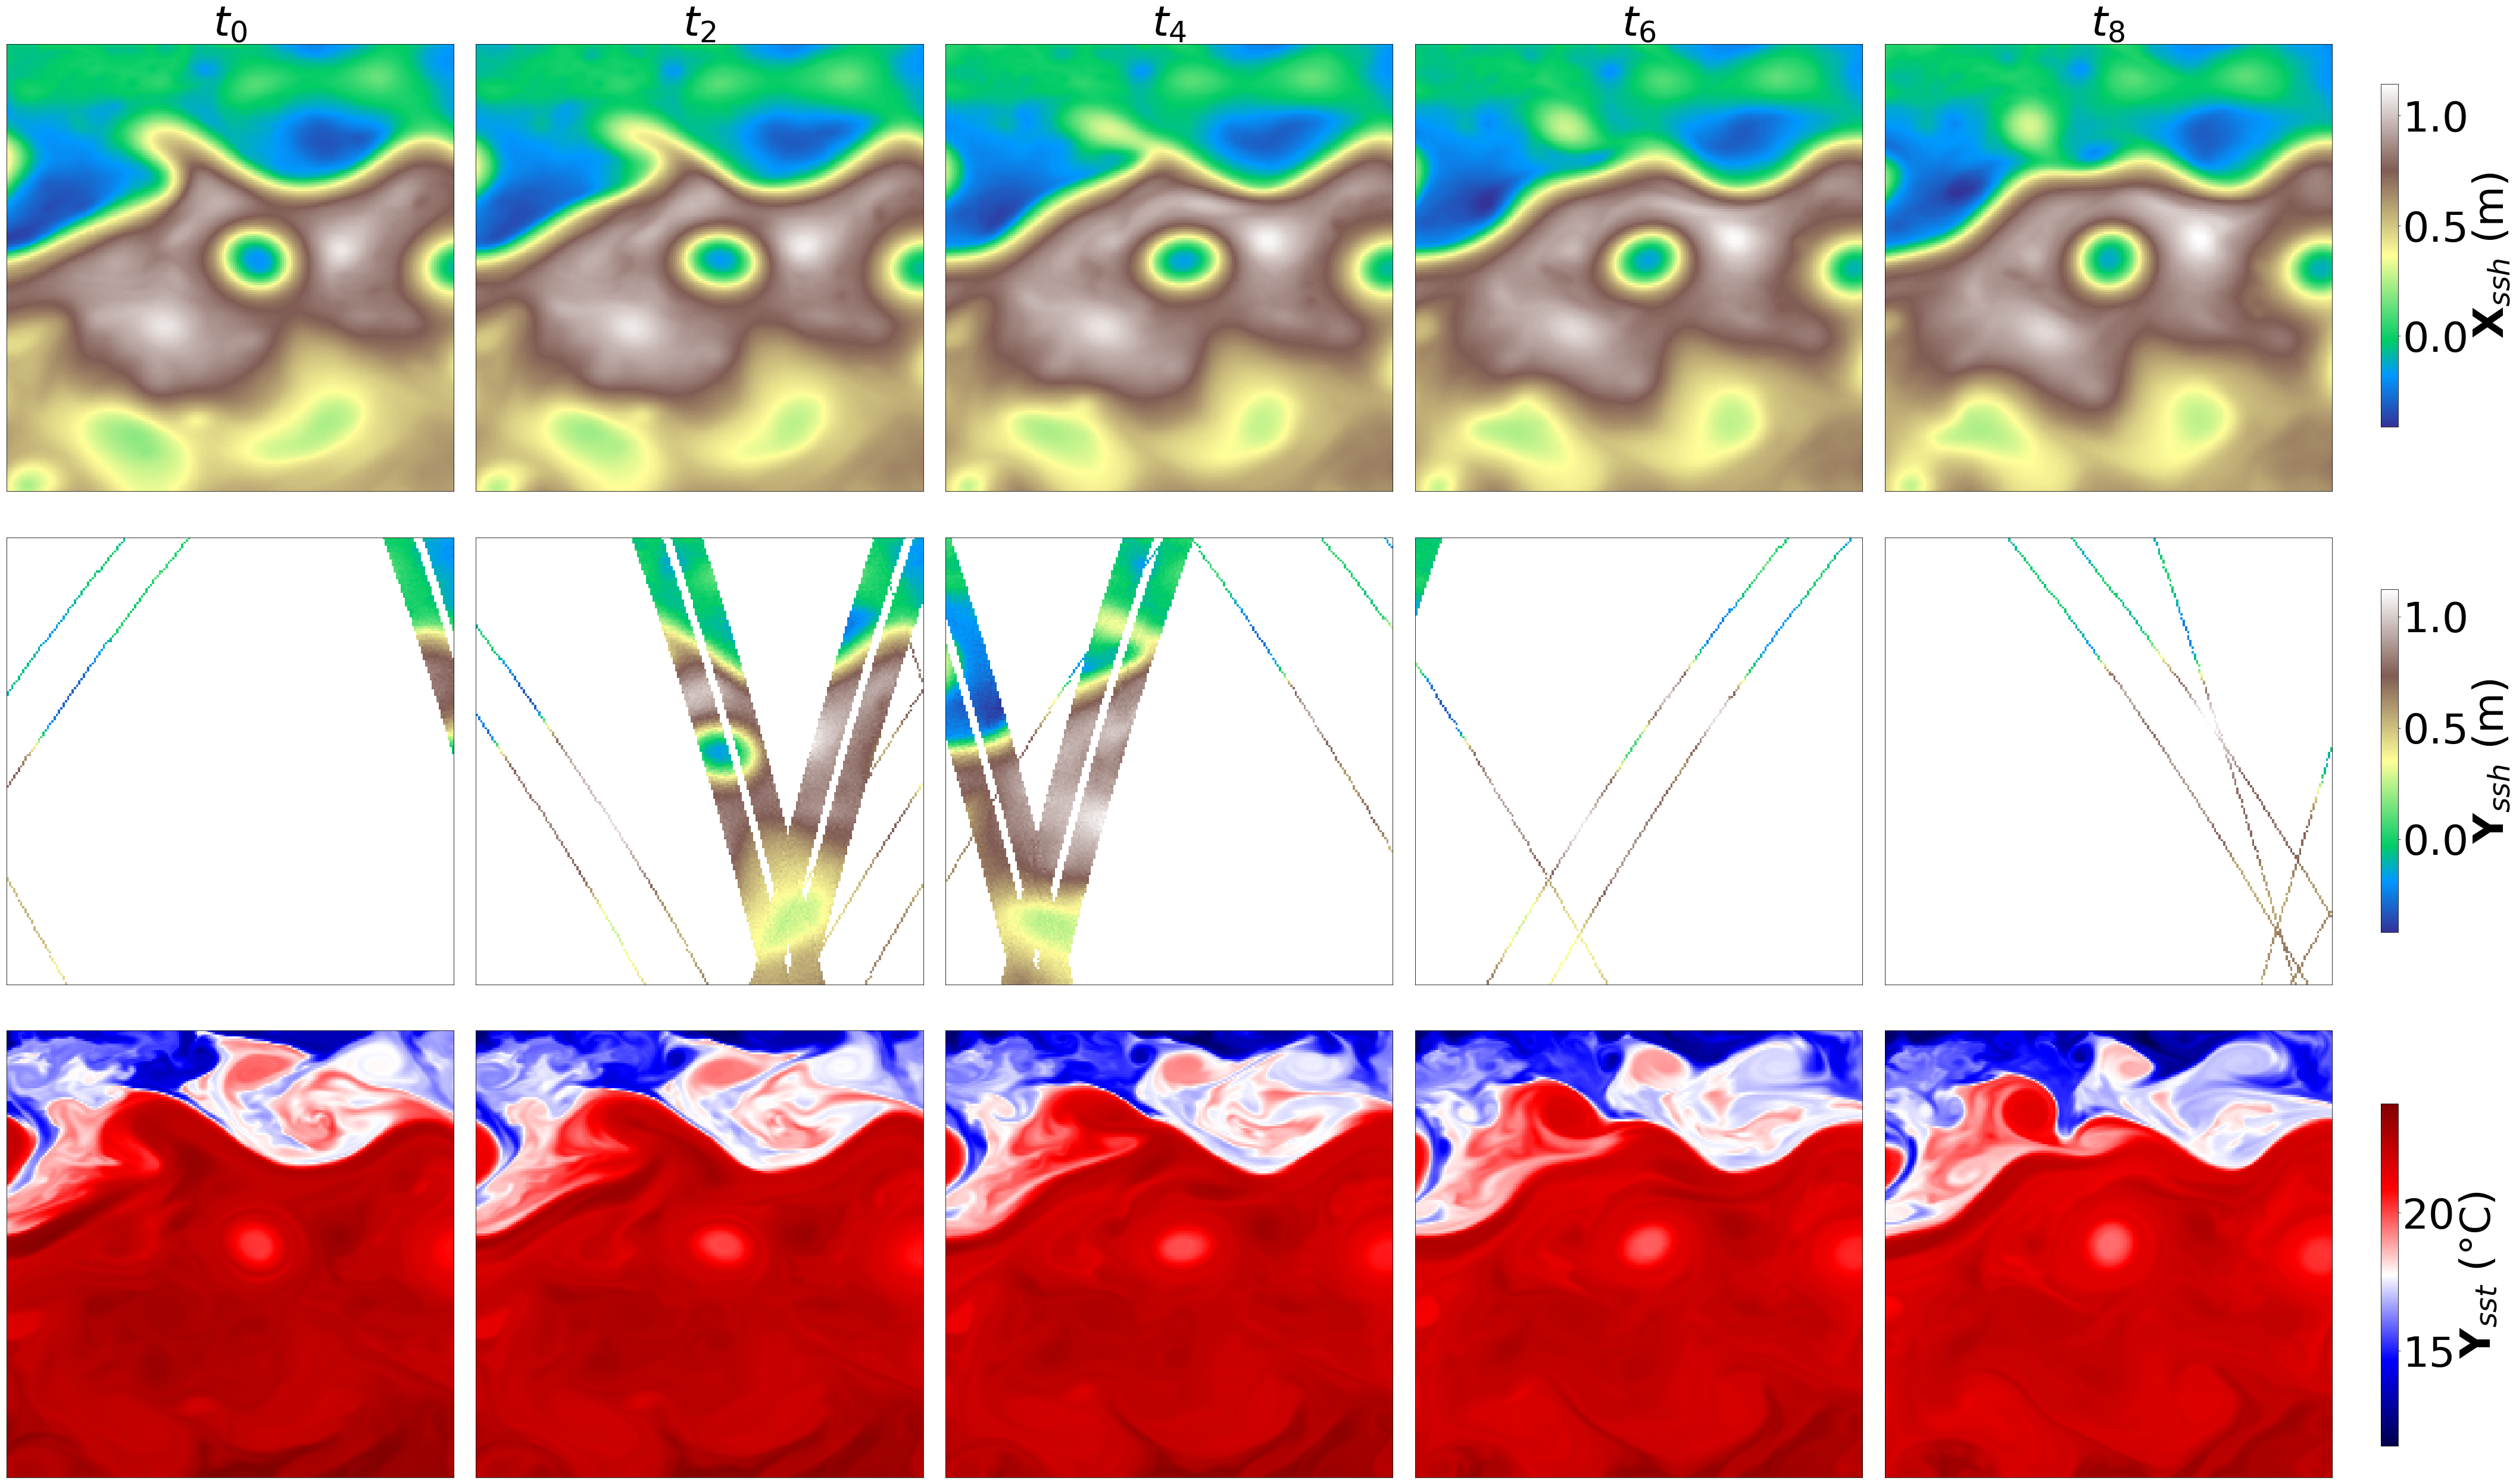

In [2]:

ds_swot=xr.open_mfdataset("swotnadir_sample.nc")

Images=[[ds_swot.REF_SSH.values[i] for i in [0,2,4,6,8]],
        [ds_swot.swot_OBS.values[i] for i in [0,2,4,6,8]],
        [ds_swot.REF_SST.values[i] for i in [0,2,4,6,8]]]
figsize=(70,45)
nrows=len(Images)
ncols=len(Images[0])
north_flip=True
cmap=["terrain","terrain","seismic"]
center_colormap=[False,False,False]
fontsize=70
label=[r"$\mathbf{X}_{ssh}$ (m)",r"$\mathbf{Y}_{ssh}$ (m)",r"$\mathbf{Y}_{sst}$ (°C)"]
save_name="tracks_example"
Title=[r"$t_0$",r"$t_2$",r"$t_4$",r"$t_6$",r"$t_8$"]
title_size=70

if north_flip:
    for i in range(nrows) :
        for j in range(ncols) :
            Images[i][j]=np.flip(Images[i][j],0)

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=figsize)
for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

clim_new=[]
for i in range(nrows) :
    
    clim=(np.nanmin(np.array(Images[i])),np.nanmax(np.array(Images[i])))
    print(clim)
    if center_colormap[i]:
        print("no")
        clim=(-max(abs(clim[0]),abs(clim[1])),max(abs(clim[0]),abs(clim[1])))


    for j in range(ncols) :
        if i==0:
            im=axes[i][j].imshow(Images[i][j],cmap=cmap[i],clim=clim)
            axes[i][j].set_title(Title[j],fontsize=title_size)
        im=axes[i][j].imshow(Images[i][j],cmap=cmap[i],clim=clim)

    
    if i==0:
        col=plt.colorbar(im,ax= axes[i][:], location ="right",shrink=0.8,anchor=(1.2,0.4))
    else:
        col=plt.colorbar(im,ax= axes[i][:], location ="right",shrink=0.8,anchor=(1.2,0.5))

    col.ax.tick_params(labelsize=fontsize)
    col.set_label(label=label[i],size=fontsize)

plt.subplots_adjust(hspace=0.05,wspace=0.05)
plt.savefig(save_name+".pdf",bbox_inches="tight")




